In [135]:
import sqlite3
# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')
# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [137]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [141]:
# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Students table created!")

Students table created!


In [143]:
# Close the cursor
cursor.close()

# Explanation
print("Cursor closed!")

Cursor closed!


In [145]:
# Create the students table
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("Students table created!")

Cursor created!
Students table created!


In [147]:
# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table created!")

Grades table created!


In [149]:
# Sample data to insert into the students table
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [25]:
# Sample data for the grades table
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 80),
    (3, 'English', 98),
    (3, 'History', 91),
    (4, 'Math', 100),
    (4, 'English', 73),
    (4, 'History', 84),
    (5, 'Math', 79),
    (5, 'English', 86),
    (5, 'History', 97)
]

# Insert data into the flavor_details table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [151]:
#1 Retrieve all students' names and their grades
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

# Fetch and display the results
joined_data = cursor.fetchall()

print("Joined students and grades details:")
for row in joined_data:
    print(row)
    

Joined students and grades details:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 80)
('Carol', 'White', 'English', 98)
('Carol', 'White', 'History', 91)
('David', 'Brown', 'Math', 100)
('David', 'Brown', 'English', 73)
('David', 'Brown', 'History', 84)
('Eve', 'Davis', 'Math', 79)
('Eve', 'Davis', 'English', 86)
('Eve', 'Davis', 'History', 97)


In [153]:
#2 Find the average grade for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

# Fetch and display the results
joined_data = cursor.fetchall()

print("Average grade of each student")
for row in joined_data:
    print(row)

Average grade of each student
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 89.66666666666667)
('David', 'Brown', 85.66666666666667)
('Eve', 'Davis', 87.33333333333333)


In [155]:
#3 Find the student with the highest average grade
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1
''')

# Fetch and display the results
highest_average_grade = cursor.fetchone()

# Display the result
print("Student with highest average grade: " + highest_average_grade[0]+ " " + highest_average_grade[1])

Student with highest average grade: Alice Johnson


In [157]:
#4 Find the average grade for the Math subject
cursor.execute('''
SELECT AVG(grade) AS average_math_grade
FROM grades
WHERE subject = 'Math'
''')

average_math_grade = cursor.fetchone()[0]

# Display the result
print(f"Average math grade: {average_math_grade}")

Average math grade: 87.2


In [159]:
#5 List all students who scored above 90 in any subject
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')

list_of_students = cursor.fetchall()

# Display the results
for row in list_of_students:
    first_name, last_name, subject, grade = row
    print(f"{first_name} {last_name}")

Alice Johnson
Carol White
Carol White
David Brown
Eve Davis


In [161]:
import pandas as pd

# Query the students data into a DataFrame
df = pd.read_sql_query('SELECT * FROM students', connection)

# Display the DataFrame
df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [163]:
# Query the grades data into a DataFrame
df = pd.read_sql_query('SELECT * FROM grades', connection)

# Display the DataFrame
df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [167]:
# Join the students and grades data into a DataFrame
df = pd.read_sql_query('SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students JOIN grades ON students.student_id = grades.student_id', connection)
# Display the DataFrame
df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


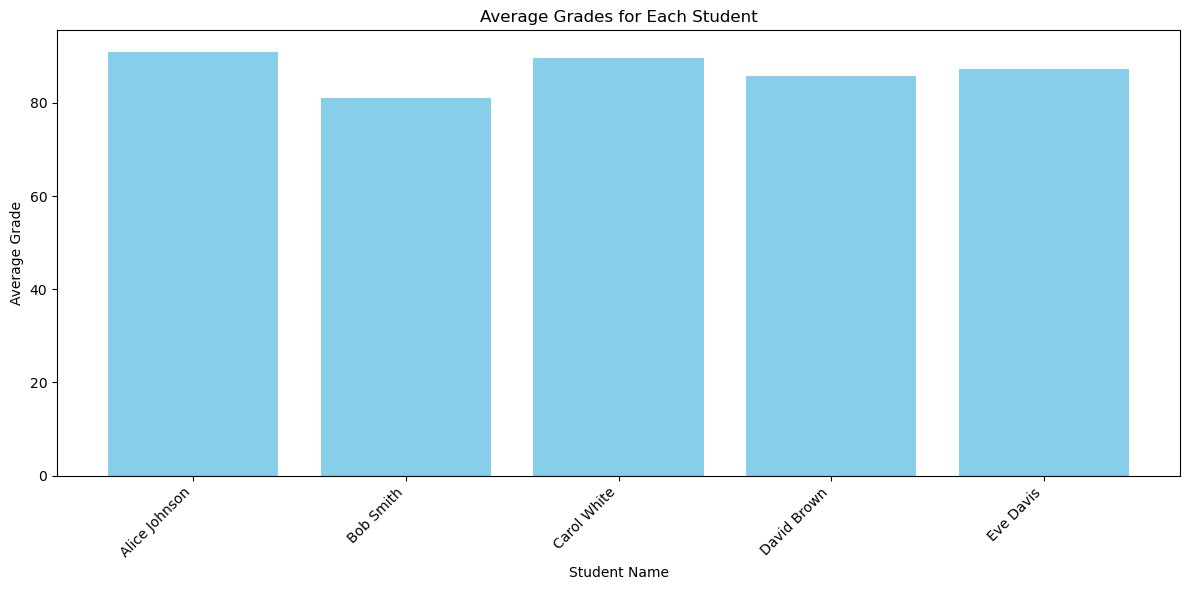

In [169]:
import matplotlib.pyplot as plt

cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''')

students_average = cursor.fetchall()
df_students_average = pd.DataFrame(students_average, columns=['first_name', 'last_name', 'average_grade'])

# Plot average grades for each student
plt.figure(figsize=(12, 6))
plt.bar(df_students_average['first_name'] + ' ' + df_students_average['last_name'], df_students_average['average_grade'], color='skyblue')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

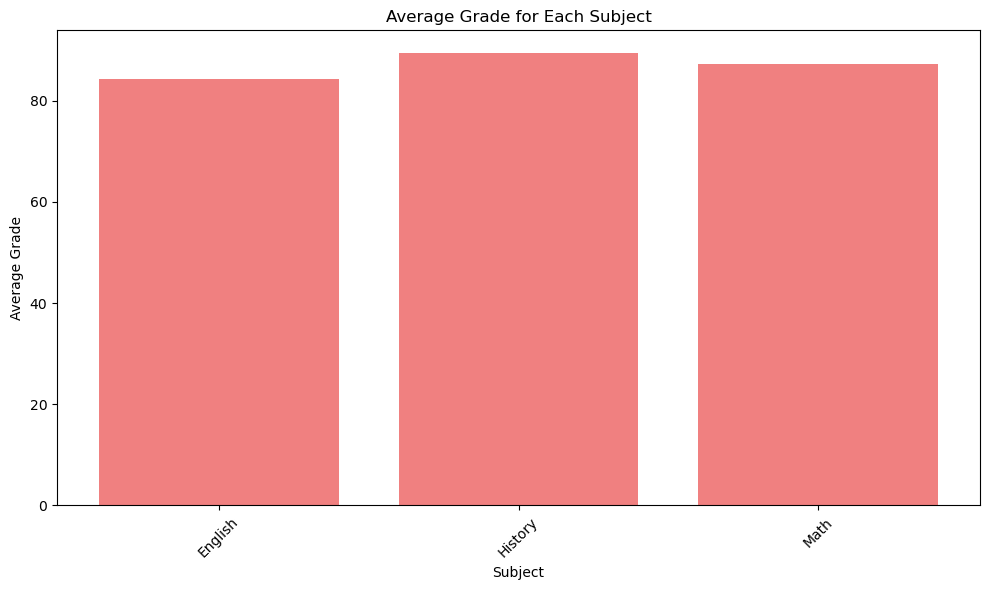

In [171]:
cursor.execute('''
    SELECT subject, AVG(grade) AS average_grade
    FROM grades
    GROUP BY subject
''')

subject_average = cursor.fetchall()

subjects = [row[0] for row in subject_average]
df_subject_average = [row[1] for row in subject_average]

# Plot average grades for each subject
plt.figure(figsize=(10, 6))
plt.bar(subjects, df_subject_average, color='lightcoral')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()